In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tweets = pd.read_csv("twitter.csv", sep=',')
weather = pd.read_csv("weather.csv", sep=',')
tweets['Tweet timestamp'] = pd.to_datetime(tweets['Tweet timestamp'], format="%d-%m-%Y %H:%M")
weather['forecast_timestamp'] = pd.to_datetime(weather['forecast_timestamp'], format="%d-%m-%Y %H:%M")
print("Tweets from ", tweets['Tweet timestamp'].min(), " To ", tweets['Tweet timestamp'].max())
print("Weather from ", weather['forecast_timestamp'].min(), " To ", weather['forecast_timestamp'].max())

Tweets from  2021-02-09 17:32:00  To  2021-02-09 20:15:00
Weather from  2021-02-09 17:33:00  To  2021-02-10 05:55:00


Text(0, 0.5, 'Temperature')

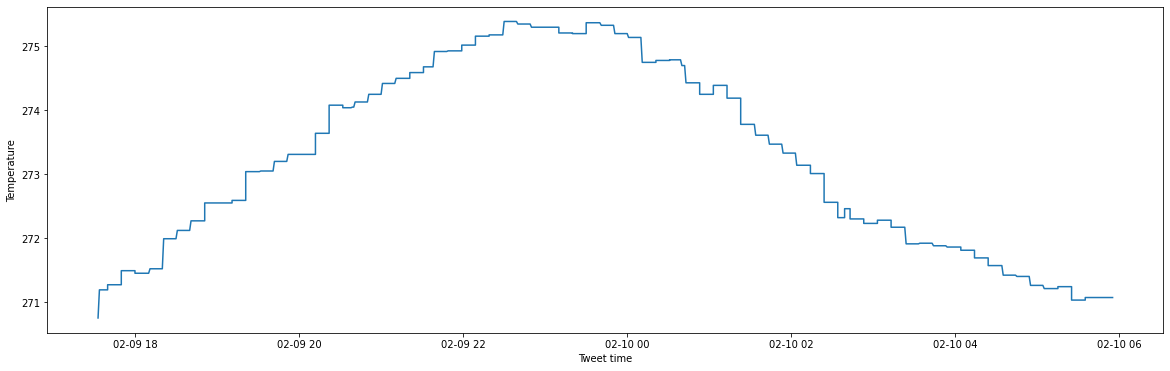

In [3]:
plt.figure(figsize=(20,6))
plt.plot(weather['forecast_timestamp'], weather['temp'])
plt.xlabel("Tweet time")
plt.ylabel("Temperature")

Text(0, 0.5, 'Temperature')

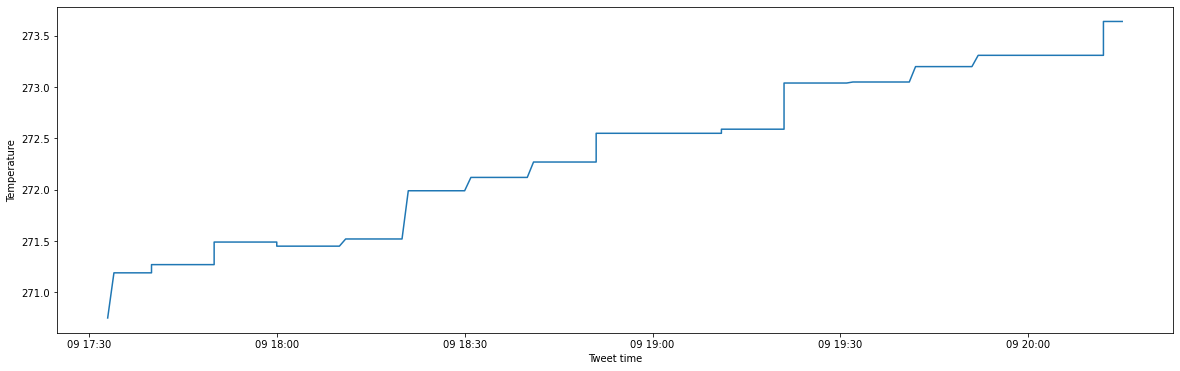

In [4]:
ww = weather[(weather['forecast_timestamp'] <= tweets['Tweet timestamp'].max())]
plt.figure(figsize=(20,6))
plt.plot(ww['forecast_timestamp'], ww['temp'])
plt.xlabel("Tweet time")
plt.ylabel("Temperature")

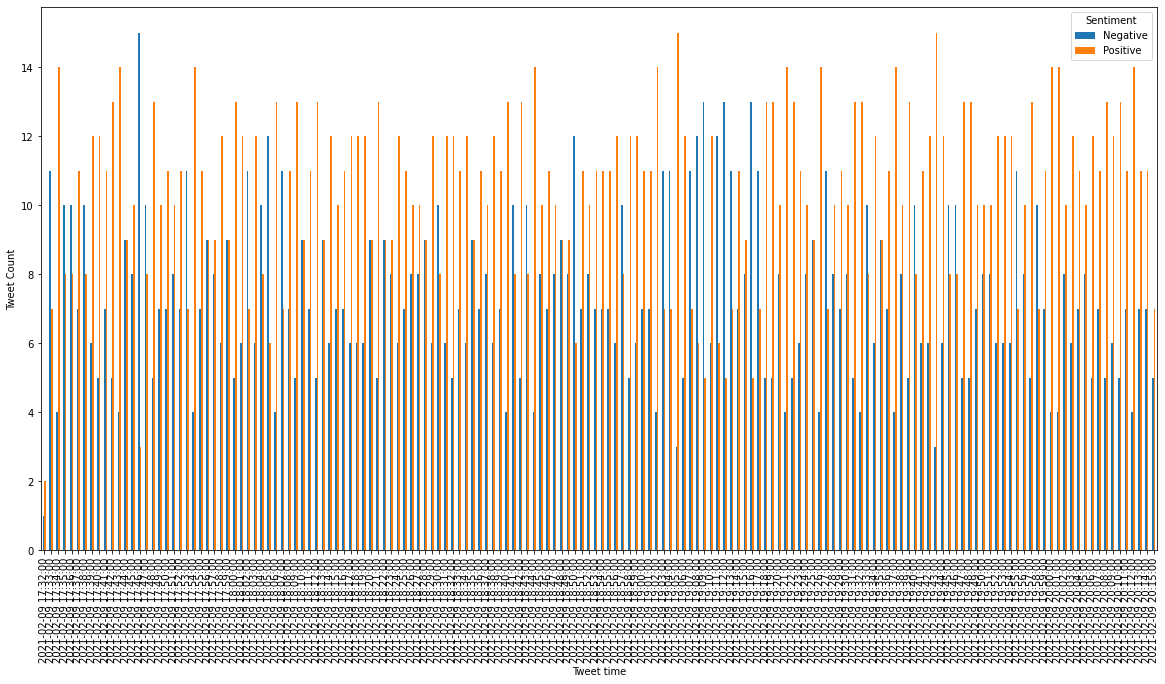

In [5]:
value_counts = tweets.groupby(['Tweet timestamp'])['Sentiment'].value_counts().rename_axis(['Tweet timestamp', 'Sentiment']).reset_index(name='counts')
#value_counts.index.names = ['test', 'check']

value_counts.pivot("Tweet timestamp", "Sentiment", "counts").plot(kind='bar', figsize=(20,10))
plt.xlabel("Tweet time")
plt.ylabel("Tweet Count")
plt.show()


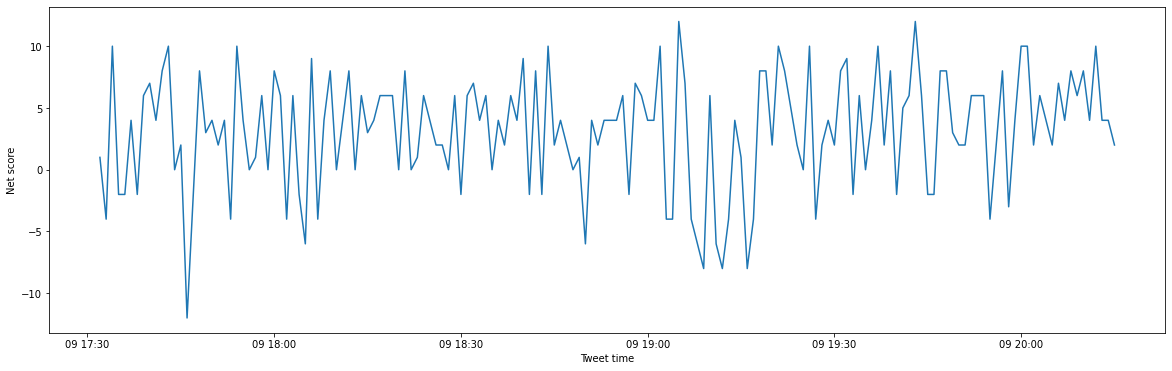

In [6]:
def scoring(senti, c_val):
    if senti == "Positive":
        return c_val
    return c_val*(-1)


value_counts['adjusted'] = value_counts.apply(lambda x: scoring(x["Sentiment"], x["counts"]), axis=1)
trend = value_counts.groupby(['Tweet timestamp'], as_index=False).agg({'adjusted' : "sum"})
plt.figure(figsize=(20,6))
plt.xlabel("Tweet time")
plt.ylabel("Net score")
plt.plot(trend['Tweet timestamp'], trend['adjusted'])

Text(0, 0.5, 'Feels like Temperature in (Kelvin)')

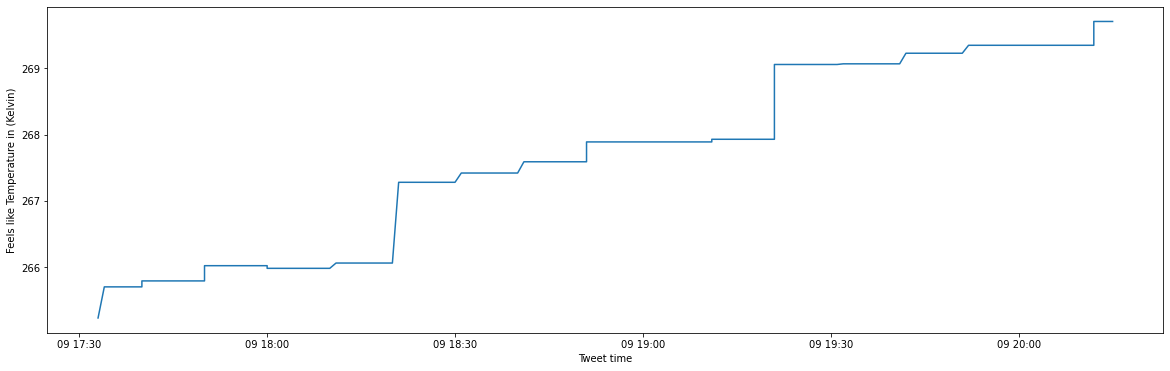

In [7]:
plt.figure(figsize=(20,6))
plt.plot(ww['forecast_timestamp'], ww['feels_like'])
plt.xlabel("Tweet time")
plt.ylabel("Feels like Temperature in (Kelvin)")